In [ ]:
### Celda para ejecutar en google Colab

from google.colab import drive
import os
drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/Multiples_anotadores/Pruebas/models'

os.chdir(root_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#!pip install tf-nightly
from regression import *
from sklearn.metrics import r2_score

In [ ]:
database = 'yacht' #['auto', 'Bike', 'concrete', 'ct', 'housing', 'yacht']

#sh_ind = loadmat('/content/gdrive/My Drive/Multiples_anotadores/data/shuffled_index_'+database+'.mat')['sh_ind']
data_path = '/content/gdrive/My Drive/Multiples_anotadores/data/' + database +'.mat' 
data = loadmat(data_path)
#heads = data['MAData'].dtype
X = data['X']
t = data['y']
Y = data['Y']
itr = data['idxtr'].astype(int)
ite = data['idxte'].astype(int)

#acc = []
#auc = []

i=5

#Xtrain, Ytrain, ttrain, Xtest, Ytest, ttest = data_partitionMA(X,Y,t,sh_ind,0.7,i)
Xtrain, ttrain = X[itr[:,i]], t[itr[:,i]]
Xtest, ttest = X[ite[:,i]],  t[ite[:,i]]
N_train = Xtrain.shape[0]

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

#R = Y.shape[1] 
N = X.shape[0]
N_train = Xtrain.shape[0]
P = X.shape[1]
K = 1

model = Keras_MA_pi_kern(K=K, R=1, P=P, epochs=100, batch_size=min(256, N_train), 
                        validation_split=0, learning_rate=0.01, ratio_lin=0.7,
                        ratio=1.5, verbose=1, scale=1, clfout=4,
                        l1=0.01, l2=0.01, seed=100, optimizer='RMS', 
                        dropout=False, BN=False)

model.fit(Xtrain, ttrain)



Epoch 1/100
1/1 [==============================] - 1s 687ms/step - loss: 331.4600
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 312.7117
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 300.2981
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 290.3676
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 281.6612
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 273.4880
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 265.9104
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 259.2770
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 252.7528
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 246.6843
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 240.7491
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 234.6216
Epoch 13/100
1/1 [===============

In [ ]:
y_probas = np.stack([model.model(Xtest, training=True) # se activa training en True para que el Dropout se aplique
                     for sample in range(100)])

#pred = scalerY.inverse_transform(np.mean(y_probas, axis=0))
pred = np.mean(y_probas, axis=0)

r2_score(ttest, pred)

0.9142126453894829

In [ ]:
pred[:10]

array([[15.468619  ],
       [ 0.71960425],
       [ 0.19205476],
       [ 0.19205476],
       [43.79243   ],
       [-0.1739865 ],
       [21.382479  ],
       [ 0.19205476],
       [28.09774   ],
       [ 0.19205476]], dtype=float32)

In [ ]:
ttest[:10]

array([[ 7.84],
       [ 4.15],
       [ 2.62],
       [ 2.77],
       [47.29],
       [ 1.96],
       [12.76],
       [ 0.24],
       [23.55],
       [ 1.31]])

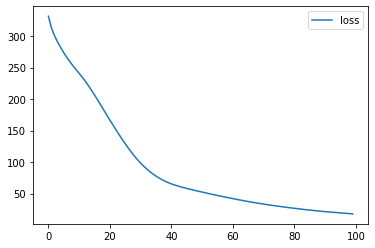

In [ ]:
model.plot_history_loss()

In [ ]:
#ttest.T

In [ ]:
#Yhat = model.predict(Xtestf)
#Yhat

In [ ]:
#model.score(Xtestf, ttest)

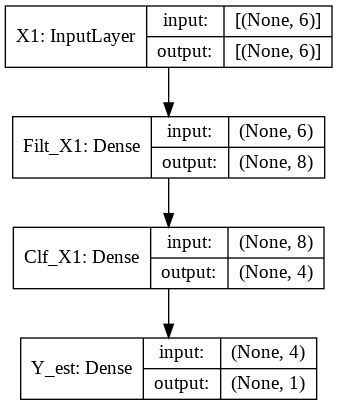

In [ ]:
tf.keras.utils.plot_model(model.model, show_shapes=True)

In [ ]:
model

Keras_MA_pi_kern(BN=False, K=1, P=6, R=1, batch_size=215, clfout=4,
                 dropout=False, epochs=100, l1=0.01, l2=0.01,
                 learning_rate=0.01, optimizer='RMS', ratio=1.5, ratio_lin=0.7,
                 scale=1, seed=100, validation_split=0, verbose=1)